<a href="https://colab.research.google.com/github/sundarjhu/Astrostatistics2021/blob/main/Astrostatistics_Lecture11_20210520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this worksheet, you will compute confidence intervals for a parameter whose estimates are $\chi^2$-distributed.

##Remind yourself: what is the expectation value (mean) of a $\chi^2(\nu=4)$ distribution? What is the variance/standard deviation?

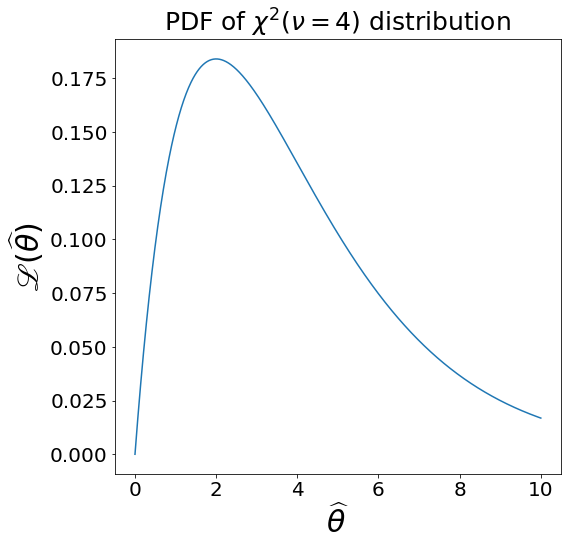

In [1]:
import numpy as np
from scipy.stats import chi2
df = 4 #degrees of freedom
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 1000)
plt.figure(figsize = (8, 8))
plt.plot(x, chi2.pdf(x, df = 4))
_ = plt.xlabel(r'$\widehat{\theta}$', fontsize = 30)
_ = plt.ylabel(r'$\mathscr{L}(\widehat{\theta})$', fontsize = 30)
_ = plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)
_ = plt.title(r'PDF of $\chi^2(\nu=4)$ distribution', fontsize = 25)

###Compute a 80% central CI for $\theta$ if its estimates $\widehat{\theta}\sim\chi^2(\nu=4)$.

In [12]:
#Central CI
alpha = 0.2 #excluded probability (significance)
central_CI_left = chi2.ppf(alpha / 2, df = df) #exclude 10% on the left side
central_CI_right = chi2.ppf(1-alpha / 2, df = df) #exclude 10% on the right side
print("The central CI is [{}, {}]".format(np.round(central_CI_left, decimals = 3), np.round(central_CI_right, decimals = 3)))
print("\n")



The central CI is [1.064, 7.779]




###Compute a 50[link text](https://)% symmetric CI about the **mean value** of $\widehat{\theta}$.

In [15]:
#Symmetric CI
alpha = 0.5 #excluded probability (significance)
mu = chi2.mean(df = df)
x = np.linspace(0, mu, 1000)
encl_prob = np.array([chi2.cdf(mu + xx, df = df) - chi2.cdf(mu - xx, df = df) for xx in x])
k = np.argmin(np.abs(encl_prob - (1 - alpha)))
print("The symmetric CI is [{}, {}].".format(np.round(mu-x[k], decimals = 3), np.round(mu+x[k], decimals = 3)))
print("Total enclosed probability: {}.".format(np.round(encl_prob[k], decimals = 3)))
print("\n")

The symmetric CI is [2.142, 5.858].
Total enclosed probability: 0.5.




###How much probability is enclosed by an interval that extends two standard deviations on either side of the mean value (i.e., $[\mu-2\sigma, \mu+2\sigma]$)?
###What kind of a confidence interval is this?

In [17]:


#\mu +- 2\sigma CI
mu = chi2.mean(df = df)
sigma = np.sqrt(chi2.var(df = df))
encl_prob = chi2.cdf(mu + 2 * sigma, df = df) - chi2.cdf(mu - 2 * sigma, df = df)
print("The probability enclosed by a 2-sigma symmetric CI around the mean is {}.".format(np.round(encl_prob, decimals = 3)))
print(mu-2*sigma, mu+2*sigma)

The probability enclosed by a 2-sigma symmetric CI around the mean is 0.953.
-1.6568542494923806 9.65685424949238


#The empirical distribution function

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curren

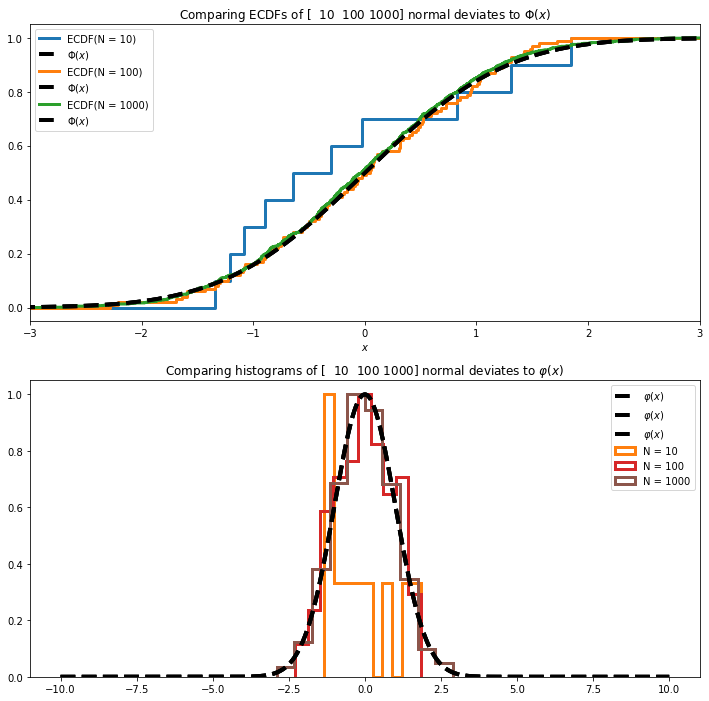

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
Ndraws = np.array([10, 100, 1000])
plt.figure(figsize = (12, 12))
plt.subplot(2, 1, 1)
for N in Ndraws:
  np.random.seed(1001)
  x = norm.rvs(size = N)
  ecdf = ECDF(x)
  plt.subplot(2, 1, 1)
  xx = list(ecdf.x); yy = list(ecdf.y)
  xx[0] = -100; xx.append(100); yy.append(1)
  plt.step(xx, yy, where = 'post', lw = 3, label = "ECDF(N = {})".format(N))
  plt.subplot(2, 1, 2)
  hist, bins, patches = plt.hist(x, alpha = 0)
  gus1, gus2, gus3 = plt.hist(x, lw = 3, histtype = "step", weights = np.ones_like(x)/np.max(hist), \
                                     label = "N = {}".format(N))
  #Plot CDF and ECDFs first
  plt.subplot(2, 1, 1)
  plt.xlabel(r"$x$")
  plt.xlim(-3, 3)
  xx = np.linspace(-10, 10, 1000)
  yy1 = norm.cdf(xx)
  plt.plot(xx, yy1, 'k--', lw = 4, label = r"$\Phi(x)$")
  plt.title(r"Comparing ECDFs of {} normal deviates to ".format(Ndraws) + r"$\Phi(x)$")
  plt.legend(loc = "best")
  #Now plot histograms and PDF
  plt.subplot(2, 1, 2)
  plt.ylim(0, 1.05)
  yy2 = norm.pdf(xx)
  plt.plot(xx, yy2/np.max(yy2), 'k--', lw = 4, label = r"$\varphi(x)$")
  plt.title(r"Comparing histograms of {} normal deviates to ".format(Ndraws) + r"$\varphi(x)$")
  plt.legend(loc = "best")
